<a href="https://colab.research.google.com/github/MeetThePatel/Econometrics-II-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("SPY2.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,200.490005,201.029999,198.589996,201.020004,182.513626,222353500
1,2016-01-05,201.399994,201.899994,200.050003,201.360001,182.822327,110845800
2,2016-01-06,198.339996,200.059998,197.600006,198.820007,180.516174,152112600
3,2016-01-07,195.330002,197.440002,193.589996,194.050003,176.185333,213436100
4,2016-01-08,195.190002,195.850006,191.580002,191.919998,174.251419,209817200


In [ ]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values


In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 8s 113ms/step - loss: 0.1453
Epoch 2/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0154
Epoch 3/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0092
Epoch 4/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0080
Epoch 5/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0064
Epoch 6/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0078
Epoch 7/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0057
Epoch 8/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0076
Epoch 9/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0077
Epoch 10/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0073
Epoch 11/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0082
Epoch 12/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0073
Epoch 13/100


In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

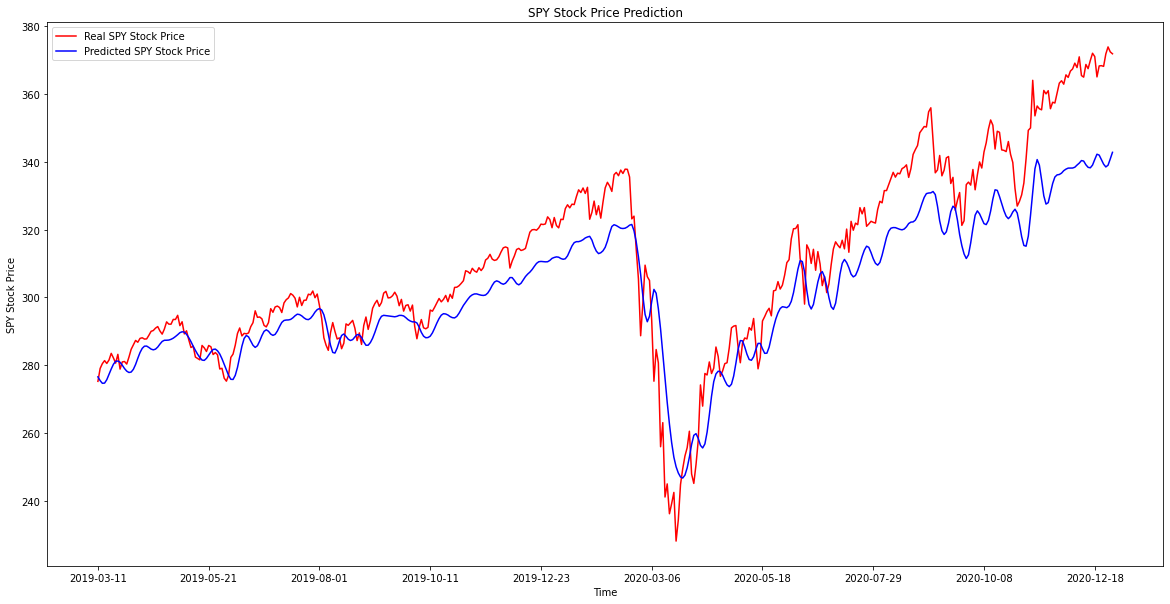

In [ ]:
# Visualising the results
plt.figure(figsize=(20, 10))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real SPY Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted SPY Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()
